<h1 align=center> HW2 - Gradient Descent , Simple Regression </h1>
$$
\textbf{Team G} \\
\text{Evangelou Sotiris 2159}\\
\text{Kalais Konstantinos 2146}\\
\text{Chatziefremidis Leuteris 2209}\\
$$

iter: 0 weight: 0.03716024999999999 bias: 0.0013953125 cost:197.38779236755377


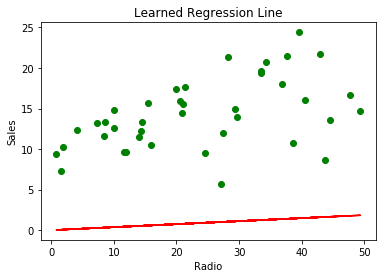

iter: 10 weight: 0.28344666741543817 bias: 0.011541166046821025 cost:74.48616728564608


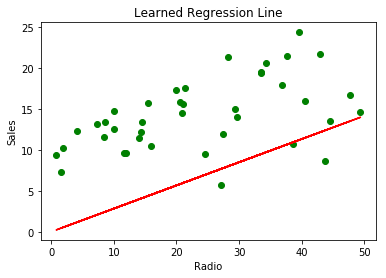

iter: 20 weight: 0.3946430009409938 bias: 0.017582480060405803 cost:49.402036076904686


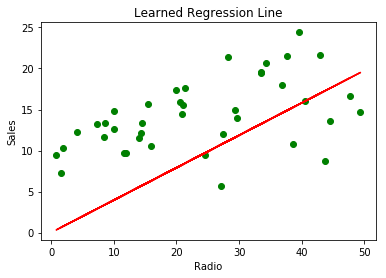

iter: 30 weight: 0.44482295700253865 bias: 0.021769457516695814 cost:44.273411630687534


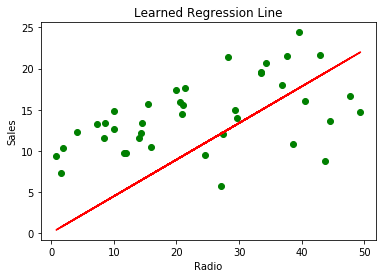

Sales = 0.025 + 0.466 *radio


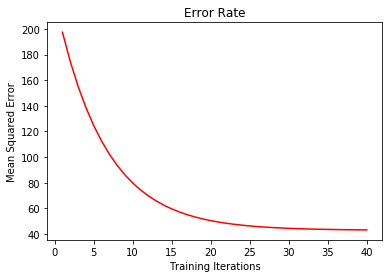

In [8]:
from random import seed
from random import randrange
import pandas as pd
import matplotlib.pyplot as plt

#Make the predictions based on the test set
def simple_linear_regression(weight,bias,test):
    predictions=[]
    test_set =[]
    actual =[]
    for row in test:
        test_set.append(row[0])
        actual.append(row[1])

    for i in test_set:
        yPred = bias + weight *i
        predictions.append(yPred)

    plt.scatter(test_set,actual,color='green')
    plt.plot(test_set,predictions,color='red')
    plt.title("Learned Regression Line")
    plt.xlabel("Radio")
    plt.ylabel("Sales")
    plt.show()

    return predictions 
#Calculate the cost   
def cost_function(radio, sales, weight, bias):
    
    total_error = 0.0
    for i in range(0,len(radio)):
        total_error += (sales[i] - (weight*radio[i] + bias))**2
    return total_error / len(radio)
#Update the weights,bias at every iteration
def update_weights(radio,sales,weight,bias,lr):
    weight_deriv=0.0
    bias_deriv=0.0
    for i in range(0,len(radio)):
        weight_deriv += -2 *radio[i] *(sales[i] -(weight*radio[i] + bias))
        bias_deriv += -2 *(sales[i] -(weight*radio[i] + bias))
    
    weight -= (weight_deriv / float(len(radio)) ) * lr
    bias -= (bias_deriv / float(len(radio)) ) * lr
    return weight,bias
def train_algorithm(radio,sales,weight,bias,lr,iters,test):
    cost_history=[]

    for i in range(0,iters):
        
        #Update the weights
        weight,bias=update_weights(radio,sales,weight,bias,lr)

        #Calculate the cost
        cost = cost_function(radio,sales,weight,bias)
        cost_history.append(cost)

        if i % 10 == 0:
            print ("iter: "+str(i)+" weight: "+str(weight)+" bias: "+str(bias)+" cost:"+str(cost))
            simple_linear_regression(weight,bias,test)

    return weight,bias,cost_history

# Split a dataset into a train and test set
def train_test_split(dataset, split):
    train = list()
    train_size = split * len(dataset)
    dataset_copy = list(dataset)
    while len(train) < train_size:
        index = randrange(len(dataset_copy))
        train.append(dataset_copy.pop(index))
    return train, dataset_copy

#Random Seed
seed(2)

#Read the csv
data=pd.DataFrame(pd.read_csv('Advertising.csv'))
dataset=[]

#Create the dataset
xVariable='radio'
yVariable='sales'
for i in range(0,len(data)):
    dataset.append([data[xVariable][i],data[yVariable][i]])

#Split to train,test
split=0.8
train,test = train_test_split(dataset,split)

#Parameters 
radio = [row[0] for row in train]
sales = [row[1] for row in train]
weight = 0.0
bias =0.0
lr =0.00005
iters=40

#Train the model
weight,bias,cost_history  = train_algorithm(radio,sales,weight,bias,lr,iters,test)

#Prepare the train_iters vector
train_iters=[]
for i in range(1,iters+1):
   train_iters.append(i)

print("Sales = %.3f + %.3f *radio"%(bias,weight))

#Plot the cost history
plt.plot(train_iters,cost_history,color='red')
plt.title("Error Rate")
plt.xlabel("Training Iterations")
plt.ylabel("Mean Squared Error")
plt.show()

